In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.initial_analysis import BrentOilAnalysisFoundation

In [2]:
brent_data_path = project_root / "data/raw/BrentOilPrices.csv"
events_output_path = project_root / "data/processed/geopolitical_events.csv"

In [3]:
foundation = BrentOilAnalysisFoundation(
    brent_data_path=brent_data_path,
    events_output_path=events_output_path
)

In [4]:
foundation.load_brent_data()

2026-02-06 17:05:13,927 - INFO - Loading Brent oil price data...
2026-02-06 17:05:14,608 - INFO - Brent data loaded successfully with 9011 rows.


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


2026-02-06 17:05:14,654 - INFO - Analyzing time series properties...


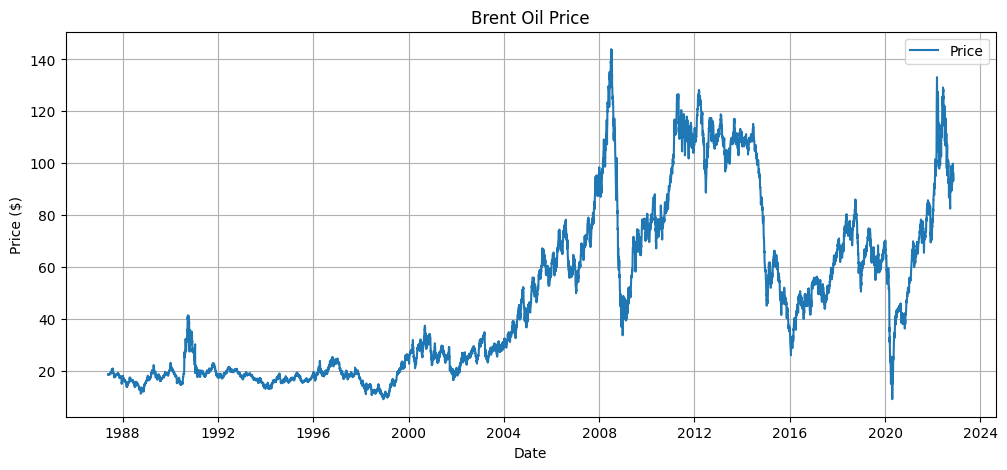

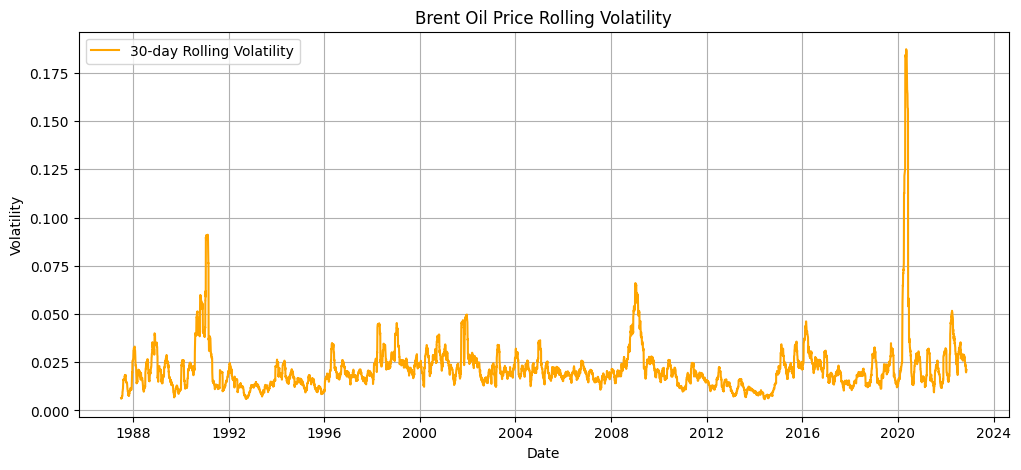

In [5]:
diagnostic_df = foundation.analyze_time_series_properties()

2026-02-06 17:05:15,535 - INFO - Performing stationarity check (ADF test)...
2026-02-06 17:05:16,002 - INFO - ADF Statistic: -1.8089
2026-02-06 17:05:16,002 - INFO - p-value: 0.3761
2026-02-06 17:05:16,002 - INFO - Series appears non-stationary (fail to reject H0)


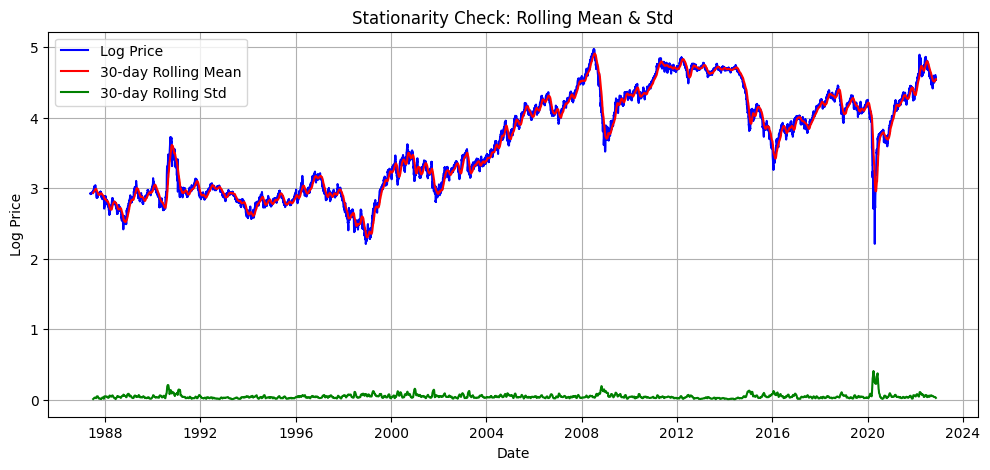

In [6]:
foundation.check_stationarity(diagnostic_df)

In [7]:
events_df = foundation.define_relevant_events()
display(events_df)

2026-02-06 17:05:16,289 - INFO - Defining major geopolitical and economic events...
2026-02-06 17:05:16,300 - INFO - Compiled 13 major events.


,event_date,event_name,description
0,1973-10-17,Arab Oil Embargo,OAPEC embargo causes supply shock.
1,1979-01-01,Iranian Revolution,Disruption of Iranian oil production.
2,1990-08-02,Iraqi Invasion of Kuwait,Severe supply disruption.
3,1997-07-01,Asian Financial Crisis,Demand shock from collapsing Asian economies.
4,2001-09-11,September 11 Attacks,Heightened geopolitical uncertainty.
5,2008-09-15,Global Financial Crisis,Sharp collapse in demand and prices.
6,2010-04-20,Deepwater Horizon Spill,Offshore production concerns.
7,2014-11-27,OPEC Maintains Production,Market share over price support.
8,2016-11-30,OPEC Production Cut Agreement,Coordinated output cuts.
9,2020-03-11,COVID-19 Pandemic Declared,Historic collapse in demand.


In [8]:
foundation.save_events_dataset(events_df)

2026-02-06 17:05:16,333 - INFO - Saving events dataset to C:\Users\amare\Documents\KAIM\week-11\change-point-analysis\data\processed\geopolitical_events.csv
2026-02-06 17:05:16,341 - INFO - Events dataset saved successfully.


# Laying the Foundation for Change Point Analysis of Brent Oil Prices
## Introduction and Objective

Birhan Energies operates in an environment where oil price volatility creates significant uncertainty for investors, policymakers, and energy companies. Brent crude oil prices are highly sensitive to geopolitical conflicts, economic shocks, and policy decisions such as OPEC production adjustments or international sanctions. Understanding when and how these events coincide with structural changes in oil prices is essential for informed decision-making, risk management, and strategic planning.

The objective of this task is to establish a strong analytical foundation for examining how major political and economic events relate to changes in Brent oil prices. This includes defining a clear data analysis workflow, understanding the statistical properties of the price series, compiling a structured dataset of relevant events, and documenting assumptions and limitations that shape interpretation. This foundation supports subsequent Bayesian change point modeling and insight generation.

## Data Analysis Workflow

The analysis workflow begins with data ingestion and validation, ensuring correct date formatting, numeric price values, and the absence of missing or duplicate observations. Exploratory data analysis is then conducted to visualize the raw price series and identify long-term trends, abrupt shocks, and periods of elevated volatility.

To better understand the statistical behavior of the series, log prices and log returns are examined. Log transformations help stabilize variance and allow clearer assessment of relative price changes over time. Stationarity tests and rolling statistics are applied to assess whether the series exhibits stable statistical properties or requires modeling approaches that explicitly allow for regime shifts.

In parallel, a structured dataset of major geopolitical and economic events is compiled in tabular form. This dataset includes OPEC policy decisions, armed conflicts in oil-producing regions, global financial crises, and major sanctions affecting energy markets, each recorded with an approximate start date and concise description. This event dataset is later used to contextualize statistically detected structural changes in prices.

Insights from exploratory analysis directly inform modeling choices, particularly the use of Bayesian change point models that allow key parameters of the time series to vary across distinct regimes.

## Time Series Properties and Their Implications

Initial exploration of the Brent oil price series reveals long-term trends, abrupt price shocks, and extended periods of heightened volatility, indicating that the raw series is non-stationary. This limits the suitability of traditional constant-parameter models without transformation or structural adjustment.

Log returns exhibit more stable behavior and reduced trend effects but still display volatility clustering, a common feature of financial time series. These characteristics motivate the use of change point models, which are designed to detect structural breaks rather than assume a single stable regime across the entire sample.

Understanding these properties is essential for selecting an appropriate modeling framework, as change point models explicitly accommodate shifts in market behavior driven by external forces or evolving economic conditions.

## Bayesian Change Point Models: Purpose and Expected Outputs

Bayesian change point models are used to identify points in time where the underlying data-generating process of a time series changes. In the context of Brent oil prices, these models aim to detect structural breaks or regime shifts, such as changes in average price levels, volatility, or overall market dynamics.

The expected outputs of a Bayesian change point analysis include posterior probability distributions over potential change point dates, as well as estimates of model parameters before and after each detected break. These outputs allow probabilistic statements about when a structural shift most likely occurred, how market behavior differed across regimes, and the uncertainty surrounding these estimates.

Rather than producing a single deterministic change date, the Bayesian framework quantifies uncertainty explicitly, which is particularly important in volatile markets where multiple overlapping influences may be present.

## Change Point Analysis: Purpose, Outputs, and Limitations

A change point model is a statistical framework designed to identify points in time at which the underlying data-generating process of a time series changes. In the context of Brent oil prices, this means detecting periods where key parameters such as the mean level, variance, or overall volatility regime shift, indicating a structural break rather than normal short-term price fluctuations.

Change point models are used because oil price dynamics are influenced by discrete shocks—such as geopolitical conflicts, policy interventions, or economic crises—that can alter market behavior in a persistent way. Traditional time series models assume stable parameters over time and therefore struggle to capture these regime shifts. Change point methods explicitly relax this assumption, making them well-suited for analyzing non-stationary financial and commodity price series.

The primary outputs of change point analysis include estimated change point dates and parameter estimates before and after each detected break. In a Bayesian framework, these outputs are expressed as posterior distributions, allowing probabilistic assessment of when a structural change most likely occurred and how the statistical properties of prices differ across regimes. These results support interpretation of how market behavior evolves over time rather than providing exact deterministic break dates.

Despite their usefulness, change point models have important limitations. They identify when statistical changes occur but do not explain why they occur. Multiple overlapping events may contribute to a single detected change, and market reactions may be anticipatory or delayed relative to observable events. Consequently, detected change points should be interpreted as indicators of structural change that require external contextual information, rather than as evidence of direct causal relationships.

## Assumptions and Limitations

This analysis assumes that Brent oil prices reasonably reflect global oil market dynamics and that major geopolitical, economic, and policy events are incorporated into prices within a relatively short time window. While Brent is a widely used global benchmark, regional supply disruptions, speculative trading behavior, and macroeconomic conditions may influence prices independently of the events explicitly modeled in this study.

Event data used in the analysis relies on approximate start dates for complex and often prolonged developments such as conflicts, sanctions, or policy shifts. Many of these events unfold gradually, overlap with other shocks, or are anticipated by market participants in advance, introducing temporal ambiguity when associating detected change points with specific real-world causes.

A key limitation of this work is the distinction between statistical correlation and causal inference. Change point models identify structural breaks in the time series and highlight periods where the statistical properties of prices change significantly. However, the detection of a change point near the timing of a known event does not prove that the event caused the price change. Other unobserved factors, simultaneous global shocks, or endogenous market dynamics may contribute to the observed shifts. As a result, event associations presented in this analysis should be interpreted as plausible explanations rather than definitive causal claims.


## Communication Strategy for Stakeholders

The results of this analysis are intended to support decision-making across multiple stakeholder groups with differing information needs. For investors, findings will be communicated through concise analytical reports and interactive dashboards that highlight major regime shifts, volatility changes, and event-linked price movements to support risk assessment and portfolio strategy. For policymakers, insights will be summarized in clear executive briefs focusing on the timing and magnitude of price responses to geopolitical and policy events, helping inform energy security and economic planning discussions. For energy companies, results will be delivered through visual dashboards and short technical summaries emphasizing structural breaks, uncertainty ranges, and forward-looking implications for operational planning, cost management, and supply chain strategy.
